In [14]:
# import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
import pathlib

## **Load dataset**

In [15]:
dataset_path = "C:/Users/abhis/Desktop/M.Tech/Study Materials/Semester 1 Assignment/Arun Sir/Project/tea sickness dataset/"
dataset_dir = pathlib.Path(dataset_path)

In [16]:
# list of sub directory(class)
class_names = []
for x in os.walk(dataset_path):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    if len(sub_dir_list) > 4:
        x_class = (sub_dir_list[-1])
        class_names.append(x_class)

print(class_names)

['', 'algal leaf', 'brown blight', 'healthy', 'red leaf spot', 'white spot']


In [17]:
# Parameter setting
train_batch = 128
val_batch = 128
img_height = 224
img_width = 224
IMG_SIZE = (img_height, img_width)
val_split = 0.2

In [18]:
# Load data for Training
train_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,
                                                       validation_split=val_split,
                                                       subset="training",
                                                       seed=123,
                                                       image_size=(img_height, img_width),
                                                       batch_size=train_batch
                                                      )
train_ds

Found 585 files belonging to 5 classes.
Using 468 files for training.


<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

In [19]:
# Load data for Validation
val_ds = tf.keras.utils.image_dataset_from_directory(dataset_dir,                                                            
                                                     validation_split=val_split,                                                            
                                                     subset="validation",                                                     
                                                     seed=123,                                                     
                                                     image_size=(img_height, img_width),                                                     
                                                     batch_size=val_batch                                                           
                                                    )

Found 585 files belonging to 5 classes.
Using 117 files for validation.


In [20]:
class_names = train_ds.class_names
print(class_names)

num_classes=len(class_names)

['algal leaf', 'brown blight', 'healthy', 'red leaf spot', 'white spot']


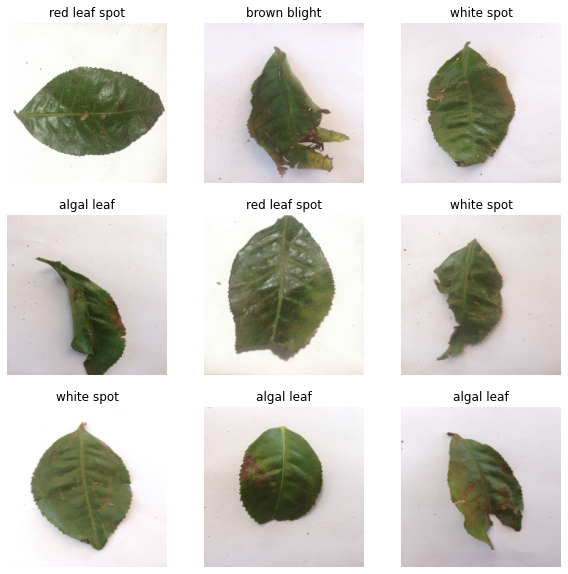

In [21]:
# Review dataset sample
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


## **Data Preprocessing**

In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## **Build Model**

In [23]:
## Data augmentation layers to increase data variation for training
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [24]:
# Model architecture
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(num_classes)
])

In [25]:
# compile model
base_learning_rate = 0.0005
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# display model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)       

## **Train Model**

In [27]:
epochs=100
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=0
)

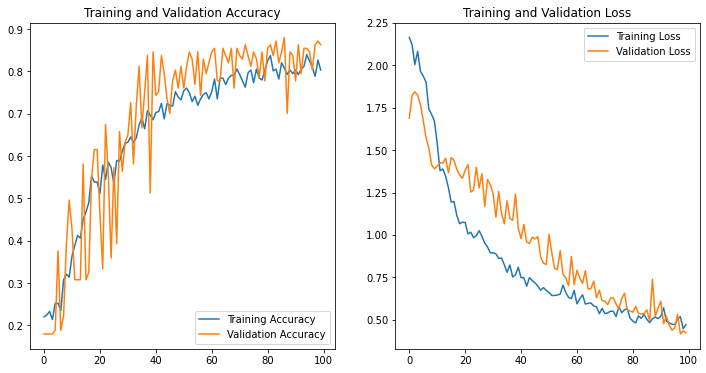

In [28]:
# Check training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Evaluate Model**

Predictions:
 [1 1 1 3 2 3 3 1 0 3 2 3 0 0 2 1 0 2 3 0 3 3 0 1 1 3 3 3 1 3 3 3 3 2 1 0 4
 4 4 3 1 4 0 3 3 0 0 3 0 4 3 1 3 3 4 3 1 3 1 1 3 2 2 4 0 4 1 1 0 0 4 1 0 3
 0 2 4 1 3 4 3 3 2 0 2 0 0 3 1 3 4 3 3 0 4 1 0 1 3 0 1 3 0 1 1 3 1 3 4 2 0
 3 1 1 1 2 1]
Labels:
 [1 1 1 3 2 3 3 0 0 3 2 3 0 0 2 4 0 2 3 3 3 3 0 1 1 3 3 3 1 3 3 3 3 2 1 0 4
 4 4 3 1 0 4 3 1 0 0 3 0 4 3 1 3 3 4 3 1 3 1 4 3 2 2 4 0 4 4 1 4 4 4 0 0 3
 0 2 4 1 3 4 3 3 2 0 2 4 0 3 1 3 4 3 3 0 4 1 0 1 3 0 1 3 0 1 4 3 4 3 4 2 0
 3 4 1 1 2 4]

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.69      0.95      0.80        21
           2       1.00      1.00      1.00        12
           3       0.97      0.97      0.97        38
           4       0.93      0.54      0.68        24

    accuracy                           0.86       117
   macro avg       0.88      0.87      0.86       117
weighted avg       0.88      0.86      0.86       117



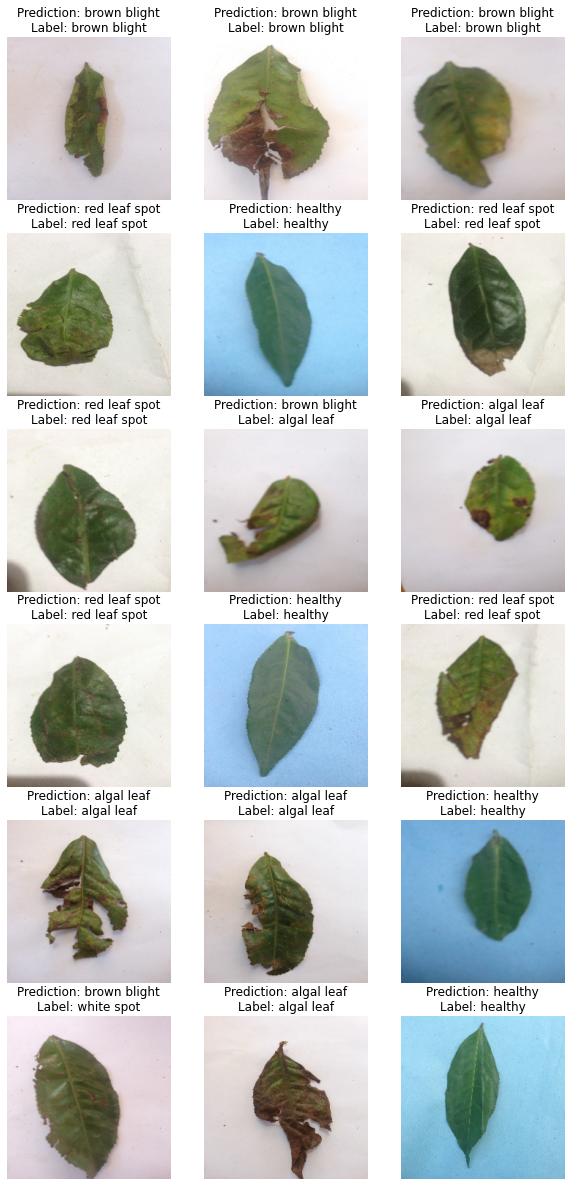

In [29]:
# Retrieve a batch of images from the test set
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

class_predictions = []
for i in predictions:
    class_prediction = np.argmax(i)
    class_predictions.append(class_prediction)

class_predictions = np.array(class_predictions)
print('Predictions:\n', class_predictions)
print('Labels:\n', label_batch)
print()
print(classification_report(label_batch, class_predictions))

plt.figure(figsize=(10, 21))
for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title("Prediction: "+class_names[class_predictions[i]]+"\nLabel: "+class_names[label_batch[i]])
    plt.axis("off")

## **Save Model History**

In [30]:
history_df = pd.DataFrame(history.history)
history_df.to_csv("history.csv")
history_df.tail()

,loss,accuracy,val_loss,val_accuracy
95,0.471472,0.824786,0.452197,0.846154
96,0.503614,0.809829,0.532125,0.803419
97,0.518472,0.788462,0.416369,0.863248
98,0.447462,0.826923,0.434429,0.871795
99,0.471466,0.803419,0.423249,0.863248


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy Score: %.3f' % accuracy_score(class_predictions, label_batch))  #predicting the accuracy score
print('Precision: %.3f' % precision_score(class_predictions, label_batch,average='weighted'))  #predicting the precision score
print('F1 Score: %.3f' % f1_score(class_predictions, label_batch, average='weighted'))        #predicting the f1_score
print('Recall Score: %.3f' % recall_score(class_predictions, label_batch, average='weighted'))    #predicting the recall score


Accuracy Score: 0.863
Precision: 0.897
F1 Score: 0.868
Recall Score: 0.863
